# Query 1: Import Library 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression

print("Halo, selamat datang. Proyek simulasi Biomassa Kelapa Sawit dimulai")

Halo, selamat datang. Proyek simulasi Biomassa Kelapa Sawit dimulai


# Query 2: Data Simulasi Dasar (Luas, TBS, Limbah)
disini menggunakan data sintetis

In [12]:
np.random.seed(42)
kebun = np.arange(1, 16)
luas_ha = np.random.randint(100, 1000, size=15)
hasil_tbs_per_ha = np.random.uniform(18, 25, size=15)
total_tbs = luas_ha * hasil_tbs_per_ha
limbah_ton = total_tbs * 0.2  # 20% limbah dari TBS

# DataFrame untuk menampilkan hasil sebagai tabel
df_q2 = pd.DataFrame({
    'Kebun': kebun,
    'Luas_ha': luas_ha,
    'TBS_per_ha': hasil_tbs_per_ha.round(2),
    'Total_TBS_ton': total_tbs.round(2),
    'Limbah_ton': limbah_ton.round(2)
})

# Tampilkan tabel
print("📊 Hasil Simulasi Awal (Query 2):")
print(df_q2)

📊 Hasil Simulasi Awal (Query 2):
    Kebun  Luas_ha  TBS_per_ha  Total_TBS_ton  Limbah_ton
0       1      202       20.34        4107.86      821.57
1       2      535       19.00       10165.04     2033.01
2       3      960       22.56       21653.97     4330.79
3       4      370       18.39        6806.11     1361.22
4       5      206       23.05        4749.12      949.82
5       6      171       24.57        4201.45      840.29
6       7      800       18.01       14404.36     2880.87
7       8      120       24.95        2993.46      598.69
8       9      714       22.32       15938.17     3187.63
9      10      221       22.28        4924.23      984.85
10     11      566       18.05       10216.00     2043.20
11     12      314       18.16        5702.69     1140.54
12     13      430       21.67        9319.57     1863.91
13     14      558       20.80       11605.86     2321.17
14     15      187       18.33        3427.09      685.42


# Query 3:
membagi Komposisi Limbah dan menghitung Hitung Energi

In [14]:
#jenis limbah
persen_efb = 0.6
persen_serat = 0.25
persen_cangkang = 0.15

#kandungan kalor
kalor_efb = 17
kalor_serat = 18
kalor_cangkang = 20

#penghitungan limbah
limbah_efb = limbah_ton * persen_efb
limbah_serat = limbah_ton * persen_serat
limbah_cangkang = limbah_ton * persen_cangkang

#mmenghitung energi/kwh di setiap limbah
energi_efb = limbah_efb * 1000 * kalor_efb * 0.278
energi_serat = limbah_serat * 1000 * kalor_serat * 0.278
energi_cangkang = limbah_cangkang * 1000 * kalor_cangkang * 0.278
total_energi_kWh = energi_efb + energi_serat + energi_cangkang

# Buat DataFrame untuk menampilkan output tabel
df_q3 = pd.DataFrame({
    'Kebun': kebun,
    'Limbah_EFB_ton': limbah_efb.round(2),
    'Limbah_Serat_ton': limbah_serat.round(2),
    'Limbah_Cangkang_ton': limbah_cangkang.round(2),
    'Energi_kWh_EFB': energi_efb.round(0),
    'Energi_kWh_Serat': energi_serat.round(0),
    'Energi_kWh_Cangkang': energi_cangkang.round(0),
    'Total_Energi_kWh': total_energi_kWh.round(0)
})

# Tampilkan tabel
print("⚙️ Komposisi Limbah & Energi per Kebun (Query 3):")
print(df_q3)

⚙️ Komposisi Limbah & Energi per Kebun (Query 3):
    Kebun  Limbah_EFB_ton  Limbah_Serat_ton  Limbah_Cangkang_ton  \
0       1          492.94            205.39               123.24   
1       2         1219.80            508.25               304.95   
2       3         2598.48           1082.70               649.62   
3       4          816.73            340.31               204.18   
4       5          569.89            237.46               142.47   
5       6          504.17            210.07               126.04   
6       7         1728.52            720.22               432.13   
7       8          359.21            149.67                89.80   
8       9         1912.58            796.91               478.15   
9      10          590.91            246.21               147.73   
10     11         1225.92            510.80               306.48   
11     12          684.32            285.13               171.08   
12     13         1118.35            465.98               279.59  

# Query4
penghitungan energi rill, biaya, dan pendapatan profit

In [22]:
# Hitung energi riil dari total energi kWh (dikalikan efisiensi pembangkit)
efisiensi = 0.8
energi_kWh_riil = total_energi_kWh * efisiensi

# Hitung pendapatan dan biaya operasional
harga_listrik = 1450  # harga jual listrik per kWh dalam Rupiah
biaya_operasional = np.random.randint(30000, 60000, size=15)  # acak per kebun
pendapatan = energi_kWh_riil * harga_listrik
biaya_total = limbah_ton * biaya_operasional
profit = pendapatan - biaya_total

# memformat string untuk  Rupiah
def format_rupiah(x):
    return f"Rp {x:,.0f}".replace(",", ".")

# DataFrame hasil perhitungan ekonomi 
df_q4 = pd.DataFrame({
    'Kebun': kebun,
    'Energi_kWh_Riil': energi_kWh_riil.round(0),
    'Harga_Listrik_Rp/kWh': harga_listrik,
    'Biaya_Operasional_Rp/ton': biaya_operasional,
    'Pendapatan_Rp': pendapatan.round(0),
    'Biaya_Total_Rp': biaya_total.round(0),
    'Laba_Bersih_Rp': profit.round(0)
})

# mengubah semuakolom Rupiah menjadi versi string yang telah di format
df_q4['Pendapatan_Rp'] = df_q4['Pendapatan_Rp'].apply(format_rupiah)
df_q4['Biaya_Total_Rp'] = df_q4['Biaya_Total_Rp'].apply(format_rupiah)
df_q4['Laba_Bersih_Rp'] = df_q4['Laba_Bersih_Rp'].apply(format_rupiah)

# Tampilkan tabel
print("💰 Tabel Ekonomi Energi Biomassa (Query 4):")
print(df_q4)


💰 Tabel Ekonomi Energi Biomassa (Query 4):
    Kebun  Energi_kWh_Riil  Harga_Listrik_Rp/kWh  Biaya_Operasional_Rp/ton  \
0       1        3234105.0                  1450                     32027   
1       2        8002892.0                  1450                     32695   
2       3       17048084.0                  1450                     56071   
3       4        5358420.0                  1450                     45422   
4       5        3738965.0                  1450                     35258   
5       6        3307783.0                  1450                     52002   
6       7       11340496.0                  1450                     36736   
7       8        2356737.0                  1450                     30391   
8       9       12548060.0                  1450                     43986   
9      10        3876825.0                  1450                     59090   
10     11        8043013.0                  1450                     42666   
11     12        4489

# Query 5
Mengitung Emisi CO₂ Teoritis dan Dihindari


In [23]:
# menentukan rasio biomassa yang dapat dikonversi ke energi (acak antara 50% - 70%)
rasio_biomassa = np.random.uniform(0.5, 0.7, size=15)
biomassa_ton = limbah_ton * rasio_biomassa

# Faktor emisi CO2 (kg CO2 per kg biomassa)
ef_co2_teoritis = 1.7 # jika bimassa dibakar langsung
ef_co2_dihindari = 1.6 # jika biomassa dijadikan energi terbarukan(misalnya listik)

# Perhitungan emisi
emisi_co2_teoritis = biomassa_ton * 1000 * ef_co2_teoritis  # dalam kg
emisi_co2_dihindari = limbah_ton * 1000 * ef_co2_dihindari  # dalam kg
net_emisi = emisi_co2_dihindari - emisi_co2_teoritis        # kg CO₂ yang dihemat

# DataFrame hasil emisi
df_emisi = pd.DataFrame({
    'Kebun': kebun,
    'Limbah_ton': limbah_ton.round(2),
    'Biomassa_ton': biomassa_ton.round(2),
    'Emisi_CO2_Teoritis_kg': emisi_co2_teoritis.round(0),
    'Emisi_CO2_Dihindari_kg': emisi_co2_dihindari.round(0),
    'Net_Emisi_kg': net_emisi.round(0)
})

# Tampilkan hasil
print("🌱 Tabel Emisi CO₂ dari Biomassa (Query 5):")
print(df_emisi)


🌱 Tabel Emisi CO₂ dari Biomassa (Query 5):
    Kebun  Limbah_ton  Biomassa_ton  Emisi_CO2_Teoritis_kg  \
0       1      821.57        561.13               953917.0   
1       2     2033.01       1362.13              2315622.0   
2       3     4330.79       2554.69              4342978.0   
3       4     1361.22        706.59              1201195.0   
4       5      949.82        545.35               927103.0   
5       6      840.29        532.55               905333.0   
6       7     2880.87       1824.12              3101010.0   
7       8      598.69        370.15               629250.0   
8       9     3187.63       1768.96              3007232.0   
9      10      984.85        602.97              1025050.0   
10     11     2043.20       1178.08              2002734.0   
11     12     1140.54        791.92              1346271.0   
12     13     1863.91       1248.42              2122310.0   
13     14     2321.17       1495.64              2542583.0   
14     15      685.42      

# Query 6
membuat Dataframe untuk outout akhir 

In [ ]:
# Buat DataFrame untuk output akhir
data = pd.DataFrame({
    'Kebun': kebun,
    'Luas_ha': luas_ha,
    'TBS_per_ha': hasil_tbs_per_ha.round(2),
    'Total_TBS_ton': total_tbs.round(2),
    'Limbah_ton': limbah_ton.round(2),
    'Limbah_EFB_ton': limbah_efb.round(2),
    'Limbah_Serat_ton': limbah_serat.round(2),
    'Limbah_Cangkang_ton': limbah_cangkang.round(2),
    'Energi_kWh_EFB': energi_efb.round(0),
    'Energi_kWh_Serat': energi_serat.round(0),
    'Energi_kWh_Cangkang': energi_cangkang.round(0),
    'Total_Energi_kWh': total_energi_kWh.round(0),
    'Energi_kWh_Riil': energi_kWh_riil.round(0),
    'Pendapatan_Rp': pendapatan.round(0),
    'Biaya_Total_Rp': biaya_total.round(0),
    'Profit_Bersih_Rp': profit.round(0),
    'Emisi_CO2_Teoritis_kg': emisi_co2_teoritis.round(0),
    'Emisi_CO2_Dihindari_kg': emisi_co2_dihindari.round(0),
    'Net_Emisi_kg': net_emisi.round(0)
})

# Format Profit jadi Rupiah string
data['Profit_Bersih_Rp_Format'] = data['Profit_Bersih_Rp'].apply(lambda x: f"Rp {x:,.0f}".replace(",", "."))

# Menampilkan ringkasan
print("\n📊 Data Simulasi Biomassa Kelapa Sawit:")
print(data[['Kebun', 'Luas_ha', 'Total_TBS_ton', 'Energi_kWh_Riil', 'Profit_Bersih_Rp_Format', 'Net_Emisi_kg']])



📊 Data Simulasi Biomassa Kelapa Sawit:
    Kebun  Luas_ha  Total_TBS_ton  Energi_kWh_Riil Profit_Bersih_Rp_Format  \
0       1      202        4107.86        3234105.0        Rp 4.663.139.560   
1       2      535       10165.04        8002892.0       Rp 11.537.724.759   
2       3      960       21653.97       17048084.0       Rp 24.476.890.407   
3       4      370        6806.11        5358420.0        Rp 7.707.879.642   
4       5      206        4749.12        3738965.0        Rp 5.388.010.245   
5       6      171        4201.45        3307783.0        Rp 4.752.588.446   
6       7      800       14404.36       11340496.0       Rp 16.337.887.286   
7       8      120        2993.46        2356737.0        Rp 3.399.074.223   
8       9      714       15938.17       12548060.0       Rp 18.054.475.017   
9      10      221        4924.23        3876825.0        Rp 5.563.201.101   
10     11      566       10216.00        8043013.0       Rp 11.575.194.198   
11     12      314      

# query 7
menilai korelasi dan regresi dari biomassa ini

In [25]:
X = data[['Luas_ha']]
y = data['Energi_kWh_Riil']
model = LinearRegression().fit(X, y)

print(f"Korelasi: {data['Luas_ha'].corr(data['Energi_kWh_Riil']):.2f}")
print(f"Koefisien Regresi: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R-squared: {model.score(X, y):.2f}")


Korelasi: 0.98
Koefisien Regresi: 16239.59
Intercept: -44576.83
R-squared: 0.96


# query 8
Visualisasi grafik akhir

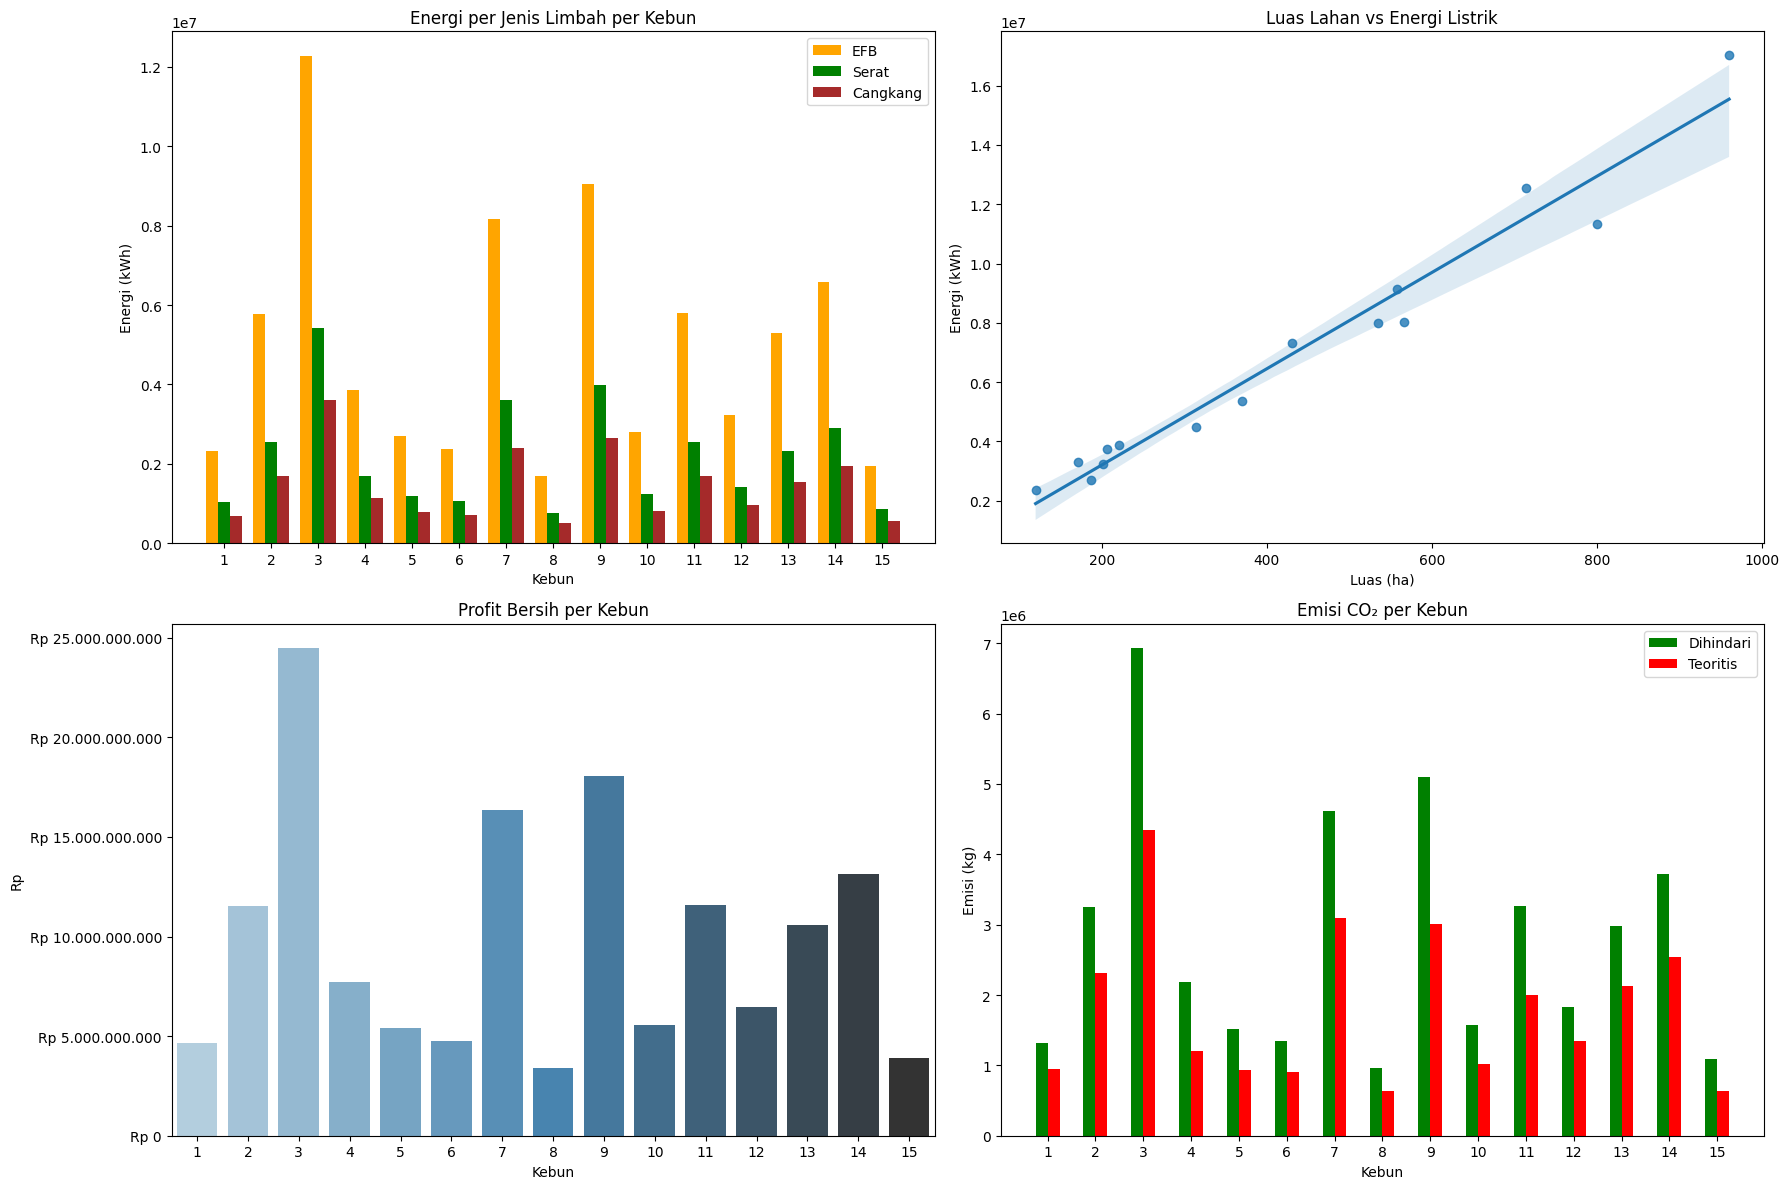

In [26]:
# Query 8: Visualisasi hasil
plt.figure(figsize=(18, 12))
bar_width = 0.25
index = np.arange(len(data))

# Plot 1: Energi per Jenis Limbah
plt.subplot(2, 2, 1)
plt.bar(index, data['Energi_kWh_EFB'], bar_width, label='EFB', color='orange')
plt.bar(index + bar_width, data['Energi_kWh_Serat'], bar_width, label='Serat', color='green')
plt.bar(index + 2 * bar_width, data['Energi_kWh_Cangkang'], bar_width, label='Cangkang', color='brown')
plt.title('Energi per Jenis Limbah per Kebun')
plt.xlabel('Kebun')
plt.ylabel('Energi (kWh)')
plt.xticks(index + bar_width, data['Kebun'])
plt.legend()

# Plot 2: Luas vs Energi Riil
plt.subplot(2, 2, 2)
sns.regplot(x='Luas_ha', y='Energi_kWh_Riil', data=data)
plt.title('Luas Lahan vs Energi Listrik')
plt.xlabel('Luas (ha)')
plt.ylabel('Energi (kWh)')

# Plot 3: Profit per Kebun
plt.subplot(2, 2, 3)
sns.barplot(x='Kebun', y='Profit_Bersih_Rp', hue='Kebun', data=data, palette='Blues_d', legend=False)
plt.title('Profit Bersih per Kebun')
plt.xlabel('Kebun')
plt.ylabel('Rp')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'Rp {x:,.0f}'.replace(",", ".")))

# Plot 4: Emisi CO2
plt.subplot(2, 2, 4)
plt.bar(index, data['Emisi_CO2_Dihindari_kg'], bar_width, label='Dihindari', color='green')
plt.bar(index + bar_width, data['Emisi_CO2_Teoritis_kg'], bar_width, label='Teoritis', color='red')
plt.title('Emisi CO₂ per Kebun')
plt.xlabel('Kebun')
plt.ylabel('Emisi (kg)')
plt.xticks(index + bar_width / 2, data['Kebun'])
plt.legend()

plt.tight_layout()
plt.show()
